<!--
模板使用方法：将此代码块转为Markdown块然后点击左侧三角渲染（依赖 jupyter-wysiwyg ）
模板参数说明：将超链接的路径替换即可
@hyperlink_1: href="https://github.com/{组织或用户}/{仓库}/blob/{分支}/{目录和文件名组成的路径}"
@hyperlink_2: href="https://nbviewer.org/github/{组织或用户}/{仓库}/blob/{分支}/{目录和文件名组成的路径}"
注意事项：在 <p>...</p> 中添加注释或者空行等行为会破坏渲染效果
-->

<!-- start of template header -->
<p>
<div style="display:flex">
<a alt="hyperlink_1" title="在Github查看当前文件" href="https://github.com/Soltus/learn-python-BI/blob/main/lesson2/%E4%BD%9C%E4%B8%9A/2/index.ipynb" target="_blank"><img src="https://img.shields.io/badge/File-black?logo=github" style="height: 38px"/></a>
<span style="width:5.8px"></span>
<a alt="hyperlink_2" title="在nbviewer查看当前文件" href="https://nbviewer.org/github/Soltus/learn-python-BI/blob/main/lesson2/%E4%BD%9C%E4%B8%9A/2/index.ipynb" target="_blank"><img src="https://img.shields.io/badge/nbviewer-white?logo=jupyter" style="height: 38px"/></a>
</div>
</p>

<!-- 避免二次渲染当前块 -->
<!-- 请勿在此处添加内容 -->
<!-- end of template header -->

<h1><span style="color: #b96ad9;">题一</span></h1>
<blockquote>
<p>运用线性回归预测房价，数据集：housing.csv</p>
</blockquote>

In [ ]:
%pip install scikit-learn

<p>&nbsp;</p>
<h2>（1）导入必要的库和数据集</h2>
<p><span style="font-size: 14pt;">首先需要导入 numpy、pandas、matplotlib 和 sklearn 等库，然后将数据集 <code>housing.csv</code> 加载到 pandasDataFrame 中。</span></p>

In [205]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

data = pd.read_csv('../data/2/housing.csv')
print(data.shape)
data.head()

(20640, 9)


,经度,纬度,房龄,总房间,总卧室,人口,家庭,中位数收入,房价
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [193]:
X = data.drop('房价', axis=1)
X.describe()

,经度,纬度,房龄,总房间,总卧室,人口,家庭,中位数收入
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [194]:
y = data[['房价']]
y.describe()

,房价
count,20640.000000
mean,206855.816909
std,115395.615874
min,14999.000000
25%,119600.000000
50%,179700.000000
75%,264725.000000
max,500001.000000


<p>&nbsp;</p>
<h2>（2）数据预处理</h2>
<p><span style="font-size: 14pt;">在这一步中，需要将数据集拆分为训练集和测试集，并对数据进行预处理操作。</span></p>

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3) # 参数test_size表示测试集所占比例，而参数random_state的作用是为了保证每次划分都是相同的。如果不指定random_state的值，每次划分的结果都会不同，这会导致模型的评估结果不稳定。
print(X_train.shape, y_train.shape)
print()
print(X_test.shape, y_test.shape)
print()


# 数据标准化
scaler = MinMaxScaler() # 由于房价数据的范围较大，使用 MinMaxScaler更加合适，能够将房价数据缩放到[0,1]之间，避免了房价数据对其他特征的影响
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


(14448, 8) (14448, 1)

(6192, 8) (6192, 1)



<p>&nbsp;</p>
<h2>（3）模型训练</h2>
<p><span style="font-size: 14pt;">导入线性回归的模型，并对训练集进行模型训练。</span></p>

In [196]:
from sklearn.linear_model import LinearRegression

# 使用LinearRegression类创建一个线性回归模型的对象linreg，然后使用fit函数对训练集进行拟合，从而训练出线性回归模型
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.intercept_)   #截距
print(linreg.coef_)        #回归系数

[365498.64871155]
[[ -432465.24212518  -402300.35383755    62176.44068291  -341283.52332289
    789664.22162959 -1303320.46622033   219073.83651368   589482.7537205 ]]


In [197]:
X_train

array([[0.21215139, 0.55744681, 0.7254902 , ..., 0.06065192, 0.10805921,
        0.15841161],
       [0.24302789, 0.6893617 , 0.92156863, ..., 0.01833011, 0.03240132,
        0.15752886],
       [0.60756972, 0.15425532, 0.78431373, ..., 0.04815157, 0.07763158,
        0.05538544],
       ...,
       [0.62549801, 0.12446809, 0.45098039, ..., 0.01429412, 0.04144737,
        0.30375443],
       [0.20717131, 0.57765957, 0.43137255, ..., 0.03845399, 0.07763158,
        0.38130509],
       [0.66035857, 0.16382979, 0.62745098, ..., 0.07208722, 0.14342105,
        0.22730031]])

<p>&nbsp;</p>
<h2>（4）模型测试和评估</h2>
<p><span style="font-size: 14pt;">使用测试集对模型进行测试，并计算模型的评估指标，如均方误差（MSE）、均方根误差（RMSE）和R2得分等。可以</span><span style="font-size: 18.6667px;">使用交叉验证来减少过拟合的风险。</span></p>

In [198]:
from sklearn.metrics import mean_squared_error, r2_score

# 使用测试集对线性回归模型进行评估
y_pred = linreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 打印评估指标
print("均方误差（MSE）：", mse)
print("均方根误差（RMSE）：", rmse)
print("R2得分：", r2)
# 均方误差（MSE）和均方根误差（RMSE）越小，模型的预测精度越高；R2得分越接近1，模型的拟合效果越好。

均方误差（MSE）： 4664231236.289809
均方根误差（RMSE）： 68295.17725498491
R2得分： 0.641656909528852


In [199]:
#模型拟合测试集
y_pred = linreg.predict(X_test)
from sklearn import metrics
#scikit-learn计算 MSE RMSE
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 4664231236.289809
RMSE: 68295.17725498491


In [200]:
from sklearn.model_selection import cross_val_predict

# k-折交叉验证
predicted = cross_val_predict(linreg, X, y, cv=10)

print("MSE:",metrics.mean_squared_error(y, predicted))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))

MSE: 5083168215.393819
RMSE: 71296.34082751947


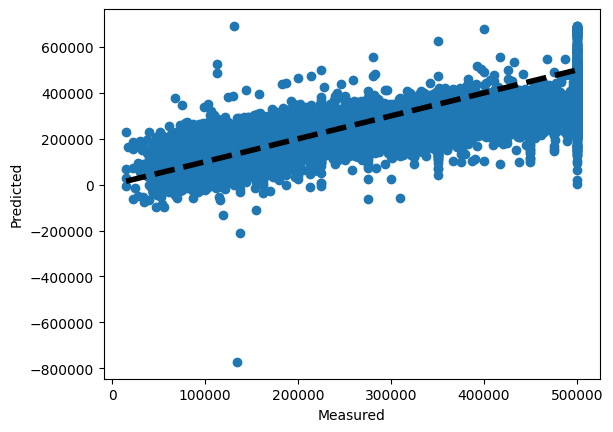

In [201]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
# 真实值和预测值的变化关系，离直线 y=x 越近的点代表预测损失越低

<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>